#  Question 2

#  KNN Glass data using SMOTE

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [192]:
glass_data = pd.read_csv("glass.csv")
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


###   Preprocessing the dataset

In [193]:
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [194]:
glass = glass_data.drop_duplicates().reset_index(drop=True)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


###  Splitting the dataset

In [195]:
X = glass.iloc[:,0:9]
y = glass.iloc[:,9]

In [196]:
y.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

###       Applying SMOTE 

In [197]:
sm = SMOTE()

In [198]:
X_smote, y_smote = sm.fit_resample(x,y)

###    Splitting the dataset as train and test 

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.25,random_state=0)

###    Standardizing the train and test variable

In [200]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

###   Building the KNN Model

In [201]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

###   Predict the KNN Model

In [202]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 2, 6, 5, 2, 3, 6, 7, 3, 6, 5, 6, 2, 6, 3, 2, 2, 1, 2, 3,
       3, 7, 2, 6, 7, 3, 7, 5, 1, 1, 5, 1, 3, 1, 6, 3, 1, 3, 5, 6, 3, 6,
       6, 7, 2, 7, 7, 6, 7, 6, 7, 7, 5, 1, 5, 5, 2, 1, 7, 1, 1, 3, 6, 5,
       3, 7, 6, 5, 5, 5, 6, 2, 5, 3, 6, 6, 7, 1, 1, 3, 6, 3, 3, 5, 1, 2,
       5, 1, 6, 7, 1, 1, 2, 1, 1, 1, 7, 1, 3, 5, 1, 3, 1, 6, 2, 3, 3, 2,
       1, 3, 6, 3], dtype=int64)

###   Evaluate the Model

<AxesSubplot:>

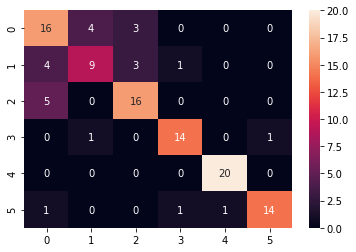

In [203]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [204]:
accuracy_score(y_test,y_pred)

0.7807017543859649

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.62      0.70      0.65        23
           2       0.64      0.53      0.58        17
           3       0.73      0.76      0.74        21
           5       0.88      0.88      0.88        16
           6       0.95      1.00      0.98        20
           7       0.93      0.82      0.87        17

    accuracy                           0.78       114
   macro avg       0.79      0.78      0.78       114
weighted avg       0.78      0.78      0.78       114



E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


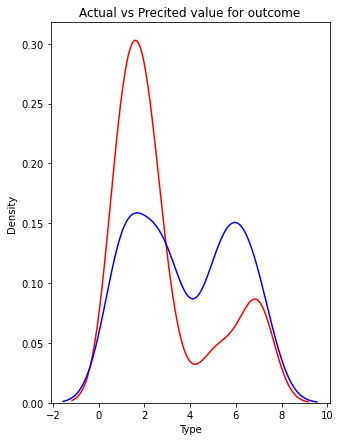

In [206]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(glass['Type'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

###   Finding the best value for n_neighbours

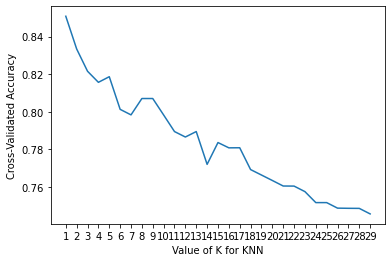

In [207]:
k_range = range(1, 30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

###    Building the KNN Model for k=1 from the above graph

In [208]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

###   Predict the KNN Model

In [209]:
y_pred_1 = model_1.predict(x_test)
y_pred_1

array([2, 1, 3, 1, 6, 5, 2, 2, 6, 7, 3, 6, 5, 6, 2, 6, 3, 1, 2, 1, 2, 1,
       3, 7, 2, 6, 5, 3, 7, 5, 2, 3, 5, 3, 3, 7, 6, 3, 1, 3, 5, 6, 2, 6,
       6, 7, 2, 7, 7, 6, 7, 6, 7, 7, 5, 1, 5, 5, 2, 1, 7, 2, 1, 3, 7, 5,
       3, 7, 6, 5, 5, 5, 6, 5, 5, 3, 6, 6, 7, 1, 2, 3, 6, 3, 3, 5, 1, 2,
       5, 3, 6, 7, 1, 1, 2, 1, 2, 2, 7, 1, 3, 5, 3, 3, 1, 6, 2, 3, 3, 2,
       1, 3, 6, 1], dtype=int64)

###   Evaluate the Model

<AxesSubplot:>

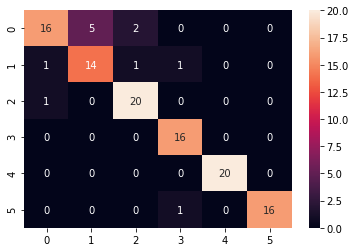

In [210]:
sns.heatmap(confusion_matrix(y_test,y_pred_1),annot=True)

In [211]:
accuracy_score(y_test,y_pred_1)

0.8947368421052632

In [212]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           1       0.89      0.70      0.78        23
           2       0.74      0.82      0.78        17
           3       0.87      0.95      0.91        21
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        20
           7       1.00      0.94      0.97        17

    accuracy                           0.89       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.89      0.89       114



E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


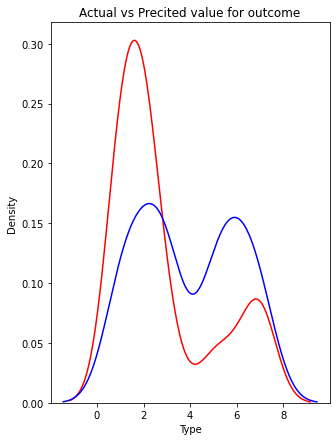

In [213]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(glass['Type'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_1, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

###   Evaluated the above two KNN model using SMOTE, a KNN classifier with number of neighbors as 1 achieves the best score/accuracy of 89%